<a href="https://colab.research.google.com/github/vrhughes/DS3001Group/blob/main/Results/VH_Data_kaggle1_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Cloning the data over from Github
! git clone https://github.com/vrhughes/DS3001Group

fatal: destination path 'DS3001Group' already exists and is not an empty directory.


In [6]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Saving all of the group AND finals data to a dataframe variable
data = pd.read_csv('https://raw.githubusercontent.com/vrhughes/DS3001Group/main/Data/kaggle1.csv')

# Taking an initial look at the data
display(data)

# Removing variables that are superfluous and/or unrelated to match performance
data = data.drop(['date', 'hour', 'left channel team1', 'left channel team2', 'left inside channel team1', 'left inside channel team2', 'central channel team1', 'central channel team2', 'right inside channel team1', 'right inside channel team2', 'right channel team1', 'right channel team2'], axis=1)
data = data.drop(['total offers to receive team1', 'total offers to receive team2', 'inbehind offers to receive team1', 'inbehind offers to receive team2', 'inbetween offers to receive team1', 'inbetween offers to receive team2', 'infront offers to receive team1', 'infront offers to receive team2', 'receptions between midfield and defensive lines team1', 'receptions between midfield and defensive lines team2', 'attempted line breaks team1', 'attempted line breaks team2', 'completed line breaksteam1', 'completed line breaks team2', 'attempted defensive line breaks team1', 'attempted defensive line breaks team2', 'switches of play completed team1', 'switches of play completed team2'], axis=1)

# Looking at the data again
display(data)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20-Nov-22,17:00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21-Nov-22,14:00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21-Nov-22,17:00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21-Nov-22,20:00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22-Nov-22,11:00,Group C,...,1,0,4,14,0,0,65,80,163,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ENGLAND,FRANCE,54%,36%,10%,1,2,10-Dec-22,20:00,Quarter-final,...,1,0,9,15,0,0,49,54,193,308
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13-Dec-22,20:00,Semi-final,...,1,0,12,10,0,0,85,63,321,260
61,FRANCE,MOROCCO,34%,55%,11%,2,0,14-Dec-22,20:00,Semi-final,...,0,0,13,14,0,0,72,47,328,218
62,CROATIA,MOROCCO,45%,45%,10%,2,1,17-Dec-22,16:00,Play-off for third place,...,0,0,7,14,0,0,75,72,288,277


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,category,total attempts team1,total attempts team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,Group A,5,6,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,Group B,13,8,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,Group A,14,9,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,Group B,6,7,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,Group C,14,3,...,1,0,4,14,0,0,65,80,163,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ENGLAND,FRANCE,54%,36%,10%,1,2,Quarter-final,14,9,...,1,0,9,15,0,0,49,54,193,308
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,Semi-final,10,12,...,1,0,12,10,0,0,85,63,321,260
61,FRANCE,MOROCCO,34%,55%,11%,2,0,Semi-final,14,13,...,0,0,13,14,0,0,72,47,328,218
62,CROATIA,MOROCCO,45%,45%,10%,2,1,Play-off for third place,14,7,...,0,0,7,14,0,0,75,72,288,277


Now that we've removed most of the irrelevant data we have a clearer view and can ask some questions.



In [8]:
##################################################

Many of the matches after the group stages went to penalty kicks which isn't accounted for in the "penalties scored ..." variables. First I'll look into this.

In [9]:
# Tells us if the game went to penalties
went_to_pen = []
for index, row in data.iterrows():
  if (row['number of goals team1'] == row['number of goals team2']) and 'Group' in row['category']:
    went_to_pen.append(False)
  elif row['number of goals team1'] == row['number of goals team2'] and 'Group' not in row['category']:
    went_to_pen.append(True)
  else:
    went_to_pen.append(False)

# now we can tell if the games went to penalties
print(went_to_pen)

# finding the indexes where games went to penalties
indexes_pen = [i for i, x in enumerate(went_to_pen) if x]
print(indexes_pen, '\n')
print('# of games that went to penalties:', len(indexes_pen))


[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, False, False, True]
[52, 54, 56, 57, 63] 

# of games that went to penalties: 5


We can confirm that this code worked because the actual number of games that went to penalty kicks was 5.

This is no working super well... I will continue to work on this

In [10]:
##################################################

Now I'll look at if there's any significant correlation between the percentage of the time that a team had possession of the ball and whether or not they won a particular game.

In [11]:
data.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,category,total attempts team1,total attempts team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,Group A,5,6,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,Group B,13,8,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,Group A,14,9,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,Group B,6,7,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,Group C,14,3,...,1,0,4,14,0,0,65,80,163,361


In [12]:
# Because our only goal with this data is to look at group stage results, we'll remove finals data
group_stage_data = data[data['category'].str.contains('Group')]
group_stage_data.head()

# Removed about 16 rows of finals data,

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,category,total attempts team1,total attempts team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,Group A,5,6,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,Group B,13,8,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,Group A,14,9,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,Group B,6,7,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,Group C,14,3,...,1,0,4,14,0,0,65,80,163,361


In [13]:
# Adding another column to the group_stage_data that's true if team1 has more goals and false if team2 has more goals:
group_stage_data['team1 won'] = group_stage_data['number of goals team1'] > group_stage_data['number of goals team2']
group_stage_data.head()

<ipython-input-13-4102eaaa02af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_stage_data['team1 won'] = group_stage_data['number of goals team1'] > group_stage_data['number of goals team2']


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,category,total attempts team1,total attempts team2,...,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,team1 won
0,QATAR,ECUADOR,42%,50%,8%,0,2,Group A,5,6,...,1,6,5,0,0,52,72,256,279,False
1,ENGLAND,IRAN,72%,19%,9%,6,2,Group B,13,8,...,1,8,13,0,0,63,72,139,416,True
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,Group A,14,9,...,0,9,15,0,0,63,73,263,251,False
3,UNITED STATES,WALES,51%,39%,10%,1,1,Group B,6,7,...,1,7,7,0,0,81,72,242,292,False
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,Group C,14,3,...,0,4,14,0,0,65,80,163,361,False


In [15]:
# Creating an array more_possesion_wins2 that iterates through group_stage_data and increase by one if possession team1 is greater than possession team2 and team1 won is true:
more_possession_wins = 0
more_possession_losses = 0
for i in range(len(group_stage_data)):
  if group_stage_data['possession team1'][i] > group_stage_data['possession team2'][i] and group_stage_data['team1 won'][i] == True:
    more_possession_wins += 1
  elif group_stage_data['possession team1'][i] < group_stage_data['possession team2'][i] and group_stage_data['team1 won'][i] == True:
    more_possession_losses += 1

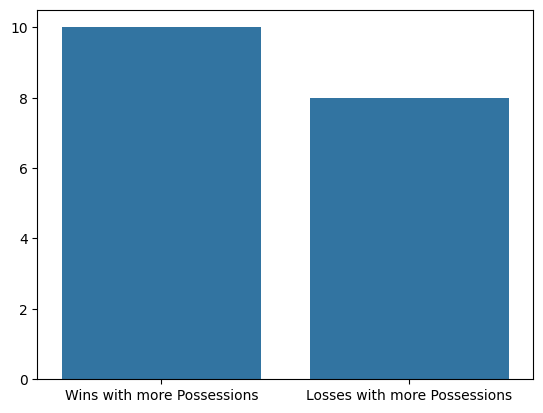

In [16]:
# Making a bar graph of the more_possessions_wins and more_possessions_losses data:
# The x_axis will have labels Wins and Losses, and the data will by on the y_axis:
sns.barplot(x=['Wins with more Possessions', 'Losses with more Possessions'], y=[more_possession_wins, more_possession_losses])
plt.show()

This is interesting, because it seems there isn't a large correlation between have possession of the ball and actually winning a game. This result can be used to inform how we model the finals matches with the other data.

In [17]:
##################################################

In [18]:
# world rankings going into the WC
rankings = {'BRAZIL' : 1,
            'BELGIUM' : 2,
            'ARGENTINA' : 3,
            'FRANCE' : 4,
            'ENGLAND' : 5,
            'SPAIN' : 7,
            'NETHERLANDS' : 8,
            'PORTUGAL' : 9,
            'DENMARK' : 10,
            'GERMANY' : 11,
            'CROATIA' : 12,
            'MEXICO' : 13,
            'URUGUAY' : 14,
            'SWITZERLAND' : 15,
            'UNITED STATES' : 16,
            'SENEGAL' : 18,
            'WALES' : 19,
            'IRAN' : 20,
            'SERBIA' : 21,
            'MOROCCO' : 22,
            'JAPAN' : 24,
            'POLAND' : 26,
            'KOREA REPUBLIC' : 28,
            'TUNISIA' : 30,
            'COSTA RICA' : 31,
            'AUSTRALIA' : 38,
            'CANADA' : 41,
            'CAMEROON' : 43,
            'ECUADOR' : 44,
            'QATAR' : 50,
            'SAUDI ARABIA' : 51,
            'CAMEROON' : 61}